<a href="https://colab.research.google.com/github/atarilover123/RSO-Telemetry/blob/master/Cassiope_PitchRollYaw_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd

In [133]:
file_open = ('/content/CassiopeTelemetry(2014_09_10).csv')

#hour, minute, Second, X position, Y position, Z position, X velocity 1, 
#X velocity 2, X velocity 3, Yaw, Pitch, Roll
colnames=['Hr', 'Min', 'Sec', 'Xp', 'Yp', 'Zp', 'Xv1', 'Xv2', 'Xv3', 'Yaw', 'Pitch', 'Roll']
df = pd.read_csv(file_open, names=colnames)
print(df)

     Hr  Min  Sec         Xp  ...     Xv3       Yaw    Pitch      Roll
0     5   20    7  2136000.0  ...  1676.2  0.140300 -55.0570 -0.092769
1     5   20   11  2113400.0  ...  1650.9  0.112440 -55.1300 -0.094975
2     5   20   15  2090700.0  ...  1625.6  0.048444 -55.1380 -0.105780
3     5   20   19  2068100.0  ...  1600.3 -0.015556 -55.1470 -0.116580
4     5   20   23  2045400.0  ...  1574.9  0.019056 -55.0660 -0.070430
..   ..  ...  ...        ...  ...     ...       ...      ...       ...
361  20   37   33  3867600.0  ...  3660.5 -0.014950  -0.2068  0.001206
362  20   37   34  3862900.0  ...  3654.8 -0.015101  -0.2072  0.002907
363  20   37   35  3858100.0  ...  3649.0 -0.015301  -0.2076  0.004707
364  20   37   36  3853400.0  ...  3643.3 -0.015501  -0.2080  0.006507
365  20   37   37  3848600.0  ...  3637.6 -0.015701  -0.2084  0.008307

[366 rows x 12 columns]


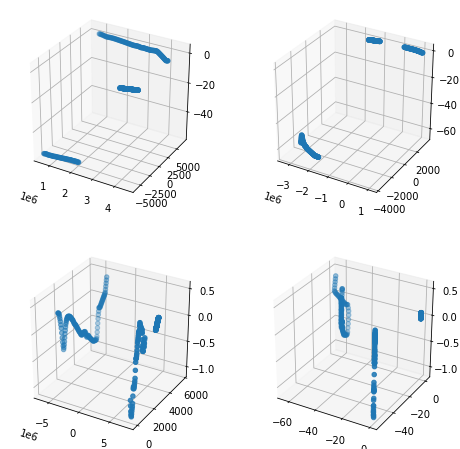

In [134]:
fig = plt.figure(figsize=(8, 8))


ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.scatter(df['Xp'], df['Xv1'], df['Pitch'])

ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.scatter(df['Yp'], df['Xv2'], df['Roll'])

ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.scatter(df['Zp'], df['Xv3'], df['Yaw'])

ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.scatter(df['Roll'], df['Pitch'], df['Yaw'])

plt.show()


In [135]:
print(df['Xp'][0])

2136000.0


In [136]:
from astropy import units as u
from astropy.coordinates import SkyCoord

sc = SkyCoord(x=df['Xp'],y=df['Yp'],z=df['Zp'],unit='km', representation_type='cartesian')

print(c)

hc=sc.transform_to('hcrs')

<SkyCoord (ICRS): (x, y, z) in km
    (3815500., 2024000., 6287300.)>


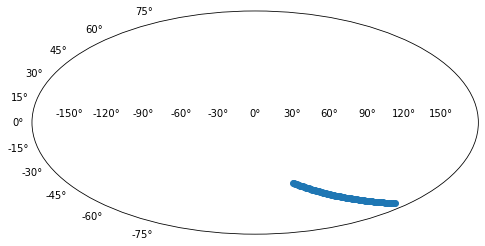

In [137]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(hc.ra.hour,hc.dec.hour)